In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams14.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,LR
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,LR
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,LR
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,LR
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,LR


In [3]:
len(df)

18363

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18363 non-null  int64  
 1   N_Person           18363 non-null  int64  
 2   Xcenter            18363 non-null  float64
 3   Ycenter            18363 non-null  float64
 4   PerXmin            18363 non-null  float64
 5   PerYmin            18363 non-null  float64
 6   PerXmax            18363 non-null  float64
 7   PerYmax            18363 non-null  float64
 8   N_Handgun          18363 non-null  int64  
 9   HgXcenter          18363 non-null  float64
 10  HgYcenter          18363 non-null  float64
 11  HgXmin             18363 non-null  float64
 12  HgYmin             18363 non-null  float64
 13  HgXmax             18363 non-null  float64
 14  HgYmax             18363 non-null  float64
 15  Intersection       18363 non-null  object 
 16  Included_Center    183

In [5]:
df.nunique()

Frame                 1932
N_Person                 4
Xcenter              14193
Ycenter              14174
PerXmin              14201
PerYmin              14198
PerXmax              14201
PerYmax              14178
N_Handgun                5
HgXcenter             7303
HgYcenter             7301
HgXmin                7305
HgYmin                7305
HgXmax                7305
HgYmax                7304
Intersection             9
Included_Center          2
Intersection_Area     8394
Hg_Area               7305
Distance             18363
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

1    16564
0     1799
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,LR,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,LR,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,LR,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,LR,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,LR,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18363 non-null  int64  
 1   N_Person                      18363 non-null  int64  
 2   Xcenter                       18363 non-null  float64
 3   Ycenter                       18363 non-null  float64
 4   PerXmin                       18363 non-null  float64
 5   PerYmin                       18363 non-null  float64
 6   PerXmax                       18363 non-null  float64
 7   PerYmax                       18363 non-null  float64
 8   N_Handgun                     18363 non-null  int64  
 9   HgXcenter                     18363 non-null  float64
 10  HgYcenter                     18363 non-null  float64
 11  HgXmin                        18363 non-null  float64
 12  HgYmin                        18363 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'LR', 0: 'RFC'}


In [10]:
print(df2['Ground_Truth'].value_counts())

1    16564
0     1799
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18363 non-null  int64  
 1   N_Person                      18363 non-null  int64  
 2   Xcenter                       18363 non-null  float64
 3   Ycenter                       18363 non-null  float64
 4   PerXmin                       18363 non-null  float64
 5   PerYmin                       18363 non-null  float64
 6   PerXmax                       18363 non-null  float64
 7   PerYmax                       18363 non-null  float64
 8   N_Handgun                     18363 non-null  int64  
 9   HgXcenter                     18363 non-null  float64
 10  HgYcenter                     18363 non-null  float64
 11  HgXmin                        18363 non-null  float64
 12  HgYmin                        18363 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14690, 28) (14690,)
(3673, 28) (3673,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9110657287648438
mean_test =  0.9106194690265486


,fit_time,score_time,test_score,train_score
0,0.089758,0.001995,0.908101,0.911051
1,0.089759,0.002992,0.907420,0.907798
2,0.090756,0.002992,0.912866,0.914152
3,0.089792,0.002987,0.913547,0.912185
4,0.088763,0.001996,0.910143,0.910521
5,0.090760,0.002988,0.916270,0.915664
6,0.093750,0.002990,0.906059,0.911353
7,0.095745,0.002994,0.909462,0.909992
8,0.096743,0.002990,0.913547,0.909538
9,0.098737,0.001990,0.908781,0.908403


In [15]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[3321,    0],
        [ 339,   13]],

       [[  13,  339],
        [   0, 3321]]], dtype=int64)

                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
19      Intersection_Center_left    0.000007  0.000020
23           Intersection_Inside    0.000111  0.000334
7                        PerYmax    0.001036  0.003109
20     Intersection_Center_right    0.001831  0.005494
1                       N_Person    0.006966  0.015565
14                        HgYmax    0.021550  0.029758
5                        PerYmin    0.023952  0.040981
15               Included_Center    0.028874  0.059681
12                        HgYmin    0.029279  0.052801
10                     HgYcenter    0.034305  0.070759
24  Intersection_No_intersection    0.035148  0.054429
9                      HgXcenter    0.039860  0.070917
3         

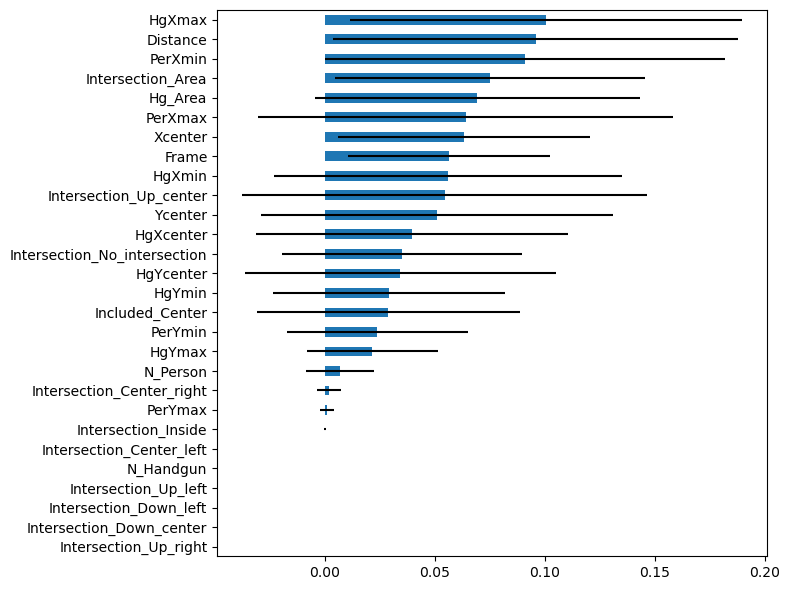

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       352
           1       0.91      1.00      0.95      3321

    accuracy                           0.91      3673
   macro avg       0.95      0.52      0.51      3673
weighted avg       0.92      0.91      0.87      3673



In [17]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18363 non-null  int64  
 1   N_Person                      18363 non-null  int64  
 2   Xcenter                       18363 non-null  float64
 3   Ycenter                       18363 non-null  float64
 4   PerXmin                       18363 non-null  float64
 5   PerYmin                       18363 non-null  float64
 6   PerXmax                       18363 non-null  float64
 7   PerYmax                       18363 non-null  float64
 8   N_Handgun                     18363 non-null  int64  
 9   HgXcenter                     18363 non-null  float64
 10  HgYcenter                     18363 non-null  float64
 11  HgXmin                        18363 non-null  float64
 12  HgYmin                        18363 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.8569689 , -1.0101039 ,  0.39447019, -1.05405625,  0.41520451,
        -0.7975828 ,  0.35767595, -1.42371212, -0.49443013,  0.6596517 ,
        -1.25310675,  0.71251883, -1.17158792,  0.6053223 , -1.33002767,
         1.16566155, -0.0538965 , -0.62860084, -0.70091022,  2.70700779,
        -0.28416304, -0.01476065, -0.00737972, -0.54212358, -1.08561054,
        -0.11960866, -0.06185952, -0.13878277],
       [-1.85480337, -1.0101039 ,  0.39418438, -1.05346752,  0.41422264,
        -0.79589907,  0.35812185, -1.42645472, -0.49443013,  0.65805131,
        -1.25396039,  0.70950718, -1.17223852,  0.60512069, -1.33108643,
         1.16566155, -0.05149029, -0.62273363, -0.69948415,  2.70700779,
        -0.28416304, -0.01476065, -0.00737972, -0.54212358, -1.08561054,
        -0.11960866, -0.06185952, -0.13878277],
       [-1.85263785, -1.0101039 ,  0.39480507, -1.0556154 ,  0.41569121,
        -0.79994071,  0.35784065, -1.4224521 , -0.49443013,  0.65787213,
        -1.2553737 ,  0.7094

In [21]:
print(scaler.mean_)

[8.57514785e+02 8.83189021e-01 3.91349093e+02 3.82307758e+02
 3.04060927e+02 2.45922220e+02 4.78637259e+02 5.18693297e+02
 2.96247890e-01 3.09326797e+02 3.11945032e+02 2.85958738e+02
 2.92406039e+02 3.32694855e+02 3.31484024e+02 4.23950335e-01
 9.35140355e+02 2.02633976e+03 2.32620927e+02 1.20078419e-01
 7.47154604e-02 2.17829331e-04 5.44573327e-05 2.27141535e-01
 5.40979143e-01 1.41044492e-02 3.81201329e-03 1.88966944e-02]


In [22]:
print(scaler.scale_)

[4.61781986e+02 8.74354632e-01 2.12057490e+02 6.89951904e+01
 2.19930954e+02 1.12238496e+02 2.12439195e+02 3.92847175e+01
 5.99170381e-01 1.52436797e+02 9.72758893e+01 1.51723196e+02
 9.92588441e+01 1.53645006e+02 9.58654372e+01 4.94182606e-01
 1.67385927e+03 1.82123768e+03 1.37678167e+02 3.25053214e-01
 2.62931665e-01 1.47574348e-02 7.37932023e-03 4.18984794e-01
 4.98317880e-01 1.17921642e-01 6.16237117e-02 1.36160234e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13772, 28)

In [25]:
y_train.value_counts()

1    12423
0     1349
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4591, 28)

In [27]:
y_test.value_counts()

1    4141
0     450
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[0.00000000e+00, 1.00000000e+00],
       [2.02692896e-07, 9.99999797e-01],
       [3.63498766e-03, 9.96365012e-01],
       ...,
       [7.65513478e-03, 9.92344865e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.05071307e-09, 9.99999999e-01]])

In [29]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[4091,   50],
        [  75,  375]],

       [[ 375,   75],
        [  50, 4091]]], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       450
           1       0.98      0.99      0.98      4141

    accuracy                           0.97      4591
   macro avg       0.93      0.91      0.92      4591
weighted avg       0.97      0.97      0.97      4591



In [32]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9868573918094685
Score test =  0.9727728163798737


In [30]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  1.0
Score test =  0.9626700411262259


In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))